In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
import numpy as np

In [64]:
train_data=pd.read_csv('/datasets/gold_recovery_train.csv')
test_data=pd.read_csv('/datasets/gold_recovery_test.csv')
full_data=pd.read_csv('/datasets/gold_recovery_full.csv')

In [65]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [66]:
train_data.info()

In [67]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [68]:
test_data.info()

In [69]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [70]:
full_data.info()

In [71]:
train_data.shape

(16860, 87)

In [72]:
test_data.shape

(5856, 53)

In [73]:
full_data.shape

(22716, 87)

## Recovery calculation 

In [74]:
train_data[['rougher.input.feed_au','rougher.output.concentrate_au','rougher.output.tail_au','rougher.output.recovery']].head()

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery
0,6.486150,19.793808,1.170244,87.107763
1,6.478583,20.050975,1.184827,86.843261
2,6.362222,19.737170,1.162562,86.842308
3,6.118189,19.320810,1.079755,87.226430
4,5.663707,19.216101,1.012642,86.688794


In [75]:
c=train_data.loc[train_data['rougher.output.recovery'].notnull()]['rougher.output.concentrate_au']
f=train_data.loc[train_data['rougher.output.recovery'].notnull()]['rougher.input.feed_au']
t=train_data.loc[train_data['rougher.output.recovery'].notnull()]['rougher.output.tail_au']
train_data['calculated_rougher_recovery']=(c*(f-t))/(f*(c-t))*100
train_data['calculated_rougher_recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: calculated_rougher_recovery, dtype: float64

In [76]:
train_data['rougher.output.recovery'].describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [77]:
train_data['calculated_rougher_recovery'].describe()

count    14287.000000
mean        82.394201
std         15.096808
min         -0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: calculated_rougher_recovery, dtype: float64

In [79]:
mae=mean_absolute_error(train_data['rougher.output.recovery'].dropna(),train_data['calculated_rougher_recovery'].dropna())
mae

9.444891926100695e-15

The difference between calculated recovery value and given recovery value is negligible hence we conclude that rougher output recovery is calculated correctly. 

In [80]:
train_data=train_data.drop('calculated_rougher_recovery',axis=1)

### Features missing from test dataset

In [81]:
s1=set(train_data.columns)
s2=set(test_data.columns)
m=s1-s2

In [82]:
train_data[m].head()

,final.output.concentrate_pb,rougher.output.tail_pb,primary_cleaner.output.tail_sol,rougher.output.recovery,rougher.output.tail_ag,final.output.tail_ag,final.output.concentrate_sol,primary_cleaner.output.concentrate_pb,rougher.calculation.au_pb_ratio,primary_cleaner.output.concentrate_ag,...,secondary_cleaner.output.tail_pb,final.output.concentrate_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_sol,rougher.output.tail_sol,secondary_cleaner.output.tail_au,final.output.tail_au,secondary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,final.output.concentrate_au
0,9.889648,0.508728,7.476074,87.107763,5.008018,10.411962,5.507324,10.389648,2.838687,8.547551,...,4.694824,6.055403,7.101074,19.529297,19.154297,2.606185,2.143149,8.764648,2.106679,42.192020
1,9.968944,0.536689,6.733907,86.843261,4.955378,10.462676,5.257781,10.497069,2.858998,8.558743,...,4.592547,6.029369,7.278807,19.369147,18.965234,2.488248,2.224930,9.001494,2.353017,42.701629
2,10.213995,0.546416,6.471768,86.842308,4.843460,10.507046,5.383759,10.354494,2.945989,8.603505,...,4.624775,6.055926,7.216833,19.167579,18.808533,2.458187,2.257889,8.842896,2.416800,42.657501
3,9.977019,0.542525,6.843791,87.226430,4.655288,10.422762,4.858634,8.496563,3.002340,7.221879,...,4.482453,6.047977,7.175616,15.978538,19.330200,2.322062,2.146849,9.122857,2.262051,42.689819
4,10.142511,0.515438,6.550154,86.688794,4.552800,10.360302,4.939416,9.986786,3.169615,9.089428,...,4.470737,6.148599,7.240205,19.199864,19.267422,2.330448,2.055292,8.871028,2.277073,42.774141


In [83]:
train_data[m].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_pb                           16788 non-null float64
rougher.output.tail_pb                                16778 non-null float64
primary_cleaner.output.tail_sol                       16579 non-null float64
rougher.output.recovery                               14287 non-null float64
rougher.output.tail_ag                                14610 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.concentrate_sol                          16490 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
rougher.calculation.au_pb_ratio                       15618 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.tail_ag                        16777 non-null float64
rougher.calculation.sulfate_to_au_concentrat

test dataset does not contain the output concentrate and tail from all the filtration processes i.e rougher output,primary cleaner output, secondary cleaner output and the final output. All these missing features have float data type.

### Preprocessing Data 

In [85]:
train_data.fillna(method='ffill',inplace=True)                     #filling missing values
test_data.fillna(method='ffill',inplace=True)
full_data.fillna(method='ffill',inplace=True)

In [86]:
train_data['date']=pd.to_datetime(train_data['date'],format='%Y-%m-%d %H:%M:%S')          #converting date to pandas datetime
full_data['date']=pd.to_datetime(full_data['date'],format='%Y-%m-%d %H:%M:%S')
test_data['date']=pd.to_datetime(test_data['date'],format='%Y-%m-%d %H:%M:%S')

### Change in concentration of metals at different stages

Text(0.5, 1.0, 'Ag')

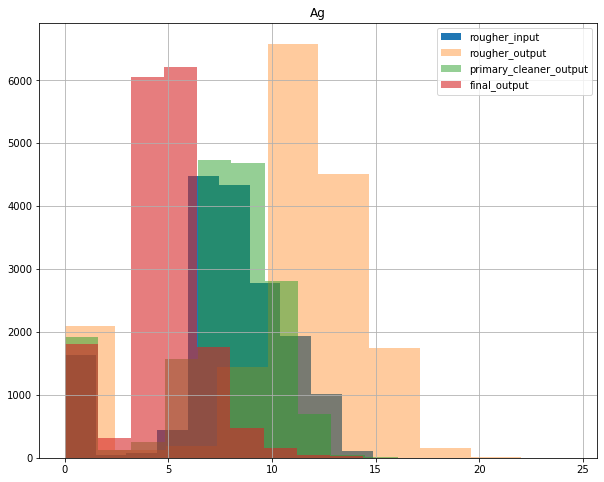

In [87]:
plt.figure(figsize=(10,8))
ax=train_data['rougher.input.feed_ag'].hist()
train_data['rougher.output.concentrate_ag'].hist(ax=ax,alpha=0.4)
train_data['primary_cleaner.output.concentrate_ag'].hist(ax=ax,alpha=0.5)
train_data['final.output.concentrate_ag'].hist(ax=ax,alpha=0.6)
ax.legend(('rougher_input','rougher_output','primary_cleaner_output', 'final_output'), fontsize=10,fancybox=True)
plt.title('Ag')

For majority the concentration of silver is decreasing from rougher input to final output.

Text(0.5, 1.0, 'Au')

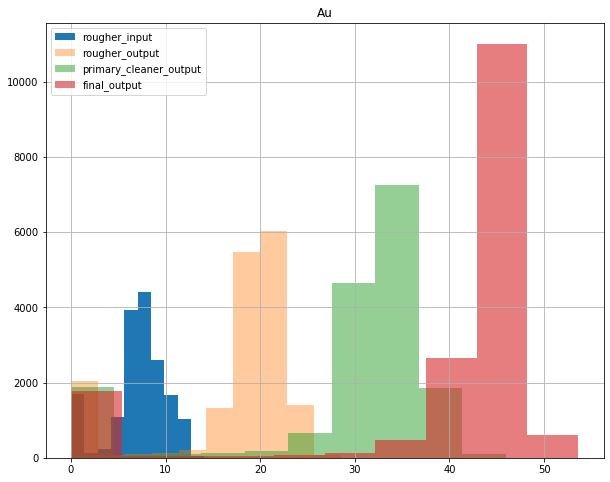

In [88]:
plt.figure(figsize=(10,8))
axi=train_data['rougher.input.feed_au'].hist()
train_data['rougher.output.concentrate_au'].hist(ax=axi,alpha=0.4)
train_data['primary_cleaner.output.concentrate_au'].hist(ax=axi,alpha=0.5)
train_data['final.output.concentrate_au'].hist(ax=axi,alpha=0.6)
axi.legend(('rougher_input','rougher_output','primary_cleaner_output', 'final_output'), fontsize=10,fancybox=True)
plt.title('Au')

The majority concentration of gold increases after successive purification as it should. 

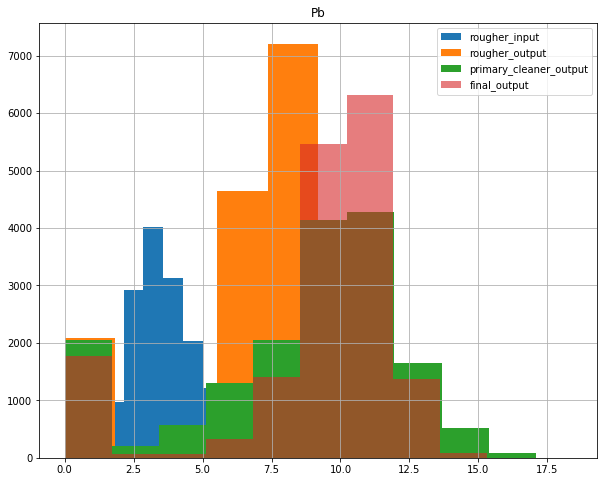

In [89]:
plt.figure(figsize=(10,8))
axis=train_data['rougher.input.feed_pb'].hist()
train_data['rougher.output.concentrate_pb'].hist(ax=axis)
train_data['primary_cleaner.output.concentrate_pb'].hist(ax=axis)
train_data['final.output.concentrate_pb'].hist(ax=axis,alpha=0.6)
axis.legend(('rougher_input','rougher_output','primary_cleaner_output', 'final_output'), fontsize=10,fancybox=True)
#axis.fig(8,6)
plt.title('Pb')
plt.show()

The majority concentration of lead seems to increase with successive purification.

### Distribution of feed particle size in train and test dataset 

Text(0.5, 1.0, 'Distribution of feed paticle size in train and test dataset')

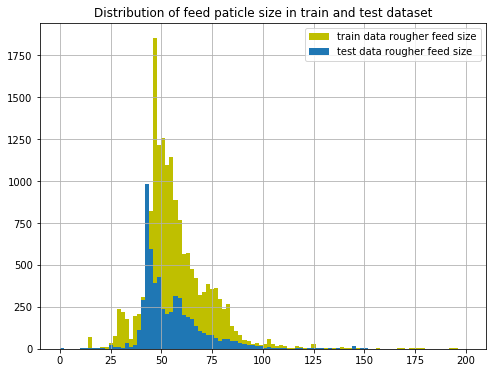

In [90]:
ax=train_data['rougher.input.feed_size'].hist(figsize=(8,6),color='y',grid=True,bins=100,range=(0,200))
test_data['rougher.input.feed_size'].hist(figsize=(8,6),grid=True,bins=100,ax=ax,range=(0,200))
ax.legend(('train data rougher feed size','test data rougher feed size'))
plt.title('Distribution of feed paticle size in train and test dataset')
#plt.ylabel('Feed particle size in train dataset')

The size of feed particle lies in the same range and has similar distribution for both train and test dataset.

In [91]:
train_data['rougher.input.feed_size'].describe()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [92]:
test_data['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

The feed particle size in train and test set has approximately the same distribution.

### Finding anomalies in distribution of total concentration of all substances at different stages

Text(0, 0.5, 'Feed Total')

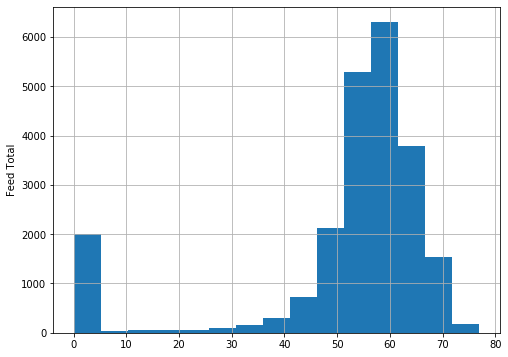

In [93]:
full_data['feed_total']=(full_data['rougher.input.feed_ag']+full_data['rougher.input.feed_au']+
  full_data['rougher.input.feed_pb']+full_data['rougher.input.feed_sol'])
full_data['feed_total'].plot(kind='hist',figsize=(8,6),grid=True,bins=15)
plt.ylabel("Feed Total")

Text(0, 0.5, 'Rougher concentrate total')

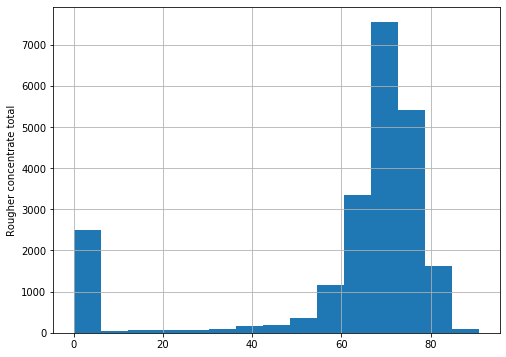

In [94]:
full_data['rougher_concentrate_total']=(full_data['rougher.output.concentrate_ag']+full_data['rougher.output.concentrate_au']+
  full_data['rougher.output.concentrate_pb']+full_data['rougher.output.concentrate_sol'])
full_data['rougher_concentrate_total'].hist(figsize=(8,6),bins=15)
plt.ylabel("Rougher concentrate total")

Text(0, 0.5, 'Final concentrate total')

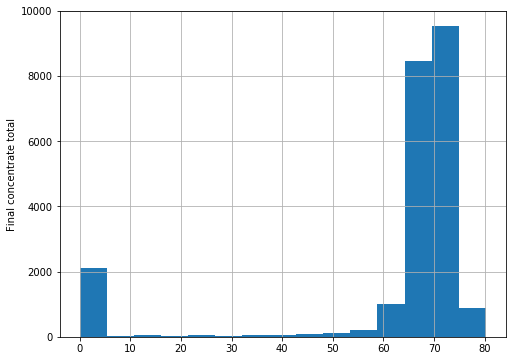

In [95]:
full_data['final_concentrate_total']=(full_data['final.output.concentrate_ag']+full_data['final.output.concentrate_au']+
 full_data['final.output.concentrate_pb']+full_data['final.output.concentrate_sol'])
full_data['final_concentrate_total'].hist(figsize=(8,6),bins=15)
plt.ylabel("Final concentrate total")

We notice that in all 3 graphs the number of values close to 0 is high i.e the total concentration is close to 0. Having 0 concentration does not make sense because then we cannot recover a profitable amount hence we will remove these values

In [96]:
(train_data[(train_data['final.output.concentrate_ag']+train_data['final.output.concentrate_au']+
            train_data['final.output.concentrate_pb']+train_data['final.output.concentrate_sol'])<=5]).count()/len(train_data)

date                                          0.103321
final.output.concentrate_ag                   0.103321
final.output.concentrate_pb                   0.103321
final.output.concentrate_sol                  0.103321
final.output.concentrate_au                   0.103321
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.103321
secondary_cleaner.state.floatbank5_b_air      0.103321
secondary_cleaner.state.floatbank5_b_level    0.103321
secondary_cleaner.state.floatbank6_a_air      0.103321
secondary_cleaner.state.floatbank6_a_level    0.103321
Length: 87, dtype: float64

In [97]:
#removing values with total concentration less than 5 from train data set
train_data=(train_data[(train_data['final.output.concentrate_ag']+train_data['final.output.concentrate_au']+
            train_data['final.output.concentrate_pb']+train_data['final.output.concentrate_sol'])>5])

In [98]:
#checking the size of anomalies in full dataset
full_data[full_data['final_concentrate_total']<=5].count()/len(full_data)

date                                          0.092534
final.output.concentrate_ag                   0.092534
final.output.concentrate_pb                   0.092534
final.output.concentrate_sol                  0.092534
final.output.concentrate_au                   0.092534
                                                ...   
secondary_cleaner.state.floatbank6_a_air      0.092534
secondary_cleaner.state.floatbank6_a_level    0.092534
feed_total                                    0.092534
rougher_concentrate_total                     0.092534
final_concentrate_total                       0.092534
Length: 90, dtype: float64

Removing anomalies from train data set is important because we will be training our model on this data and anomalies account for approx 10% of training dataset. For full dataset it accounts for 9% of the data so test data does not contain a significant amount of anomalies.So we decide not to remove them from test dataset

In [99]:
full_data=full_data.drop(['feed_total','rougher_concentrate_total','final_concentrate_total'],axis=1)


In [100]:
#creating a new test dataset which contains the target columns 
#i.e rougher.output.recovery and final.output.recovery by joining with full data set

test_new=test_data.join(full_data.set_index('date')[['final.output.recovery','rougher.output.recovery']],on='date',how='left')

In [101]:
((test_new.set_index('date')['rougher.input.feed_au']==test_data.set_index('date')['rougher.input.feed_au']).sum()/
 test_data['rougher.input.feed_au'].count())

1.0

### Building models 

In [102]:
#storing the features required for rougher.output.recovery in a list
features=[]
for i in list(test_data.columns):
    if 'rougher' in i:
        features.append(i)
print(features)        

['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']


In [113]:
# defining smape function
def smape(y,yhat):
    
    n=len(y)
    d=(abs(y)+abs(yhat))/2
    smape=(1/n)*(sum(abs(y-yhat)/d))*100
    return smape
score=make_scorer(smape,greater_is_better=False)


In [104]:
#Linear Regression model for rougher recovery concentrate prediction

features_rougher=train_data[features]
y_rougher=train_data['rougher.output.recovery']
scaler1=StandardScaler()
scaler1.fit(features_rougher)
features_rougher=scaler1.transform(features_rougher)

model_rougher=LinearRegression()
#model_rougher.fit(features_rougher,y_rougher)
r_smape = cross_val_score(model_rougher,features_rougher,y_rougher,scoring=score,cv=5)
r_smape.mean()

-14.227164939286112

In [105]:
#Linear Regression model for final recovery concentrate prediction

features_final=train_data[list(test_data.columns)]
features_final.drop('date',axis=1,inplace=True)
y_final=train_data['final.output.recovery']
scaler2=StandardScaler()
scaler2.fit(features_final)
features_final=scaler2.transform(features_final)

model_final=LinearRegression()
#model_final.fit(features_final,y_final)
f_smape=cross_val_score(model_final,features_final,y_final,scoring=score,cv=5)
f_smape.mean()


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


-12.443197863540018

In [106]:
#finding the right depth of tree for Random Forest Model for rougher recovery prediction
mse=[]
for i in range(3,10,1):
    model_1=RandomForestRegressor(random_state=12345,n_estimators=20,max_depth=i)
    #model_1.fit(features_rougher,y_rougher)
    rougher_smape = cross_val_score(model_1,features_rougher,y_rougher,scoring=score,cv=5)
    mse.append(rougher_smape.mean())
print("Max depth",mse.index(max(mse))+3," ",max(mse))

Max depth 7   -12.66070801849476


In [107]:
# finding tree depth for Random forest for final recovery prediction
mse=[]
for i in range(3,11,1):
    model_2=RandomForestRegressor(random_state=12345,n_estimators=20,max_depth=i)
    #model_2.fit(features_final,y_final)
    final_smape=cross_val_score(model_2,features_final,y_final,scoring=score,cv=5)
    mse.append(final_smape.mean())
print("Max depth",mse.index(max(mse))+3," ",max(mse))

Max depth 5   -10.191519089837414


Tree depth with lowest rougher smape is 7 and with lowest final smape is 5.Also Random forest models have lower average smapes than Linear Regression models so we will use Random Forest for prediction 

In [108]:
# finding the number of trees 
mse=[]
for i in range(10,60,10):
    model_1=RandomForestRegressor(random_state=12345,n_estimators=i,max_depth=7)
    #model_1.fit(features_rougher,y_rougher)
    rougher_smape = cross_val_score(model_1,features_rougher,y_rougher,scoring=score,cv=5)
    mse.append(rougher_smape.mean())
print("n_estimators",mse.index(max(mse))*10+10," ",max(mse))

n_estimators 4   -12.66070801849476


In [114]:
mse=[]
for i in range(10,80,10):
    model_2=RandomForestRegressor(random_state=12345,n_estimators=i,max_depth=5)
    #model_2.fit(features_final,y_final)
    final_smape=cross_val_score(model_2,features_final,y_final,scoring=score,cv=5)
    mse.append(final_smape.mean())
print("n_estimators",mse.index(max(mse))*10+10," ",max(mse))

n_estimators 40   -10.109543809836378


In [110]:
#fitting Random forest with tuned hyperparameters
model_rougher=RandomForestRegressor(random_state=12345,n_estimators=20,max_depth=7)
model_rougher.fit(features_rougher,y_rougher)

rougher_smape = cross_val_score(model_rougher,features_rougher,y_rougher,scoring=score,cv=5)

model_final=RandomForestRegressor(random_state=12345,n_estimators=40,max_depth=5)
model_final.fit(features_final,y_final)

final_smape=cross_val_score(model_final,features_final,y_final,scoring=score,cv=5)

print("smape for rougher recovery",rougher_smape.mean())
print("smape for final recovery",final_smape.mean())

final_score=0.25*rougher_smape+0.75*final_smape
print("final smape",final_score.mean())
    

smape for rougher recovery -12.66070801849476
smape for final recovery -10.109543809836378
final smape -10.747334862000974


### The best model 

In [111]:
#final weighted smape for predicted recovery values of rougher and final concentrate using Random Forest Model 
features_r=test_data[features]
features_r=scaler1.transform(features_r)
y_r=test_new['rougher.output.recovery']

features_f=test_data.drop('date',axis=1)
features_f=scaler2.transform(features_f)
y_f=test_new['final.output.recovery']

r_smape=smape(y_r,model_rougher.predict(features_r))
f_smape=smape(y_f,model_final.predict(features_f))
score=0.25*r_smape+0.75*f_smape
print(score)

11.498816054504523


In [161]:
#Sanity check
clf_r=DummyRegressor()
clf_r.fit(features_rougher,y_rougher)
clf_f=DummyRegressor()
clf_f.fit(features_final,y_final)
r_smape=smape(y_r,clf_r.predict(features_r))
f_smape=smape(y_f,clf_f.predict(features_f))
score=0.25*r_smape+0.75*f_smape
print(score)
#cross_validate(clf_r,features_r,y_r,clf_f,features_f,y_f) 

12.762239853191588


Since the value of smape for fitted model is lower than baseline model which predicts mean of training dataset.Our model can be used for rougher recovery and final recovery prediction.